# Stroop Task Analysis

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.


First, we load the data and take a look at it.

In [31]:
import pandas as pd
stroop_data = pd.read_csv(r'stroopdata.csv')
stroop_data.shape

(24, 2)

In [32]:
stroop_data.columns

Index([u'Congruent', u'Incongruent'], dtype='object')

In [33]:
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


*1.What is our independent variable? What is our dependent variable?*

The congruent condition is independent variable, it is controlled in the experiment. The time it takes to name the ink colors in equally-sized lists is dependent variable, it is ralated to whether the colors match the words.


*2.What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? *

- Null Hypothesis: congruent condition doesn't affect the response time, there are no actual differences of time between congruent group and incongruent group in terms of statistics.
- Alternative Hypothesis: congruent condition does affect the response time.

There are only 24 samples in this dataset, less than 30, so I will use T test to perform the analysis.


In [34]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


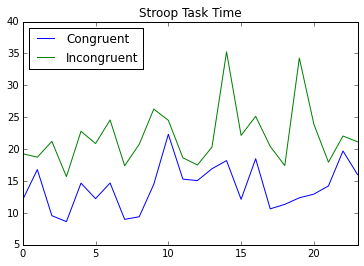

In [35]:
%matplotlib inline
stroop_data.plot(title = 'Stroop Task Time')

*3.Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.*

There are 24 samples in this dataset, from the figure above, at each point, the time in incongruent group is higher than that of congruent group. The mean time for congruent and incongruent group is 14.05 and 22.02 respectively. The variance of congruent group is 3.56 whereas that of incongruent is 4.80. Obviously the incongruent group has higher mean time and variance. Also, the minium time of incongruent is 15.7, larger than 50% of congruent group. 


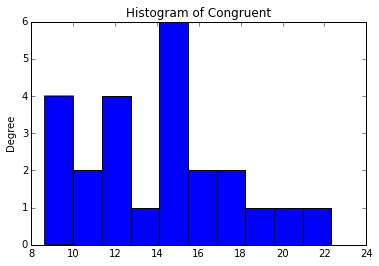

In [43]:
stroop_data.Congruent.plot(kind='hist',bins=10,title="Histogram of Congruent")

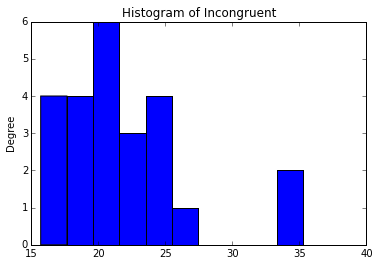

In [44]:
stroop_data.Incongruent.plot(kind='hist',bins=10,title="Histogram of Incongruent")

*4.Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.*

As the two histograms showed above, both of the sample sampled data were not symmetric, without clear tendancies, the time of incongruent group centered around 23, whereas congruent group centered around 14. The data in the first figure seemed a little right skewed, there were many peaks in congruent group, and there were obvious outliers in incongruent group.


In [51]:
#Mean and Standard Error for each group
time_dif = stroop_data.Congruent - stroop_data.Incongruent
time_dif_mean = time_dif.mean()
time_dif_std = time_dif.std()
print 'Mean value of time differences', time_dif_mean
print 'Standard value of time differences', time_dif_std

Mean value of time differences -7.96479166667
Standard value of time differences 4.86482691036


In [64]:
import math
from scipy.stats import t
alpha = 0.05
time_dif_std_sample = time_dif_std/math.sqrt(len(time_dif))
t_value = math.fabs(time_dif_mean/time_dif_std_sample)
t_alpha_percentile = t.ppf(1 - alpha / 2, df = len(time_dif)-1)  
print 'Critical value:{0:.2f}'.format(t_value)
print 'T value when alpha is 0.025:{0:.2f} '.format(t_alpha_percentile)

Critical value:8.02
T value when alpha is 0.025:2.07 


In [74]:
confint = (0 - t_alpha_percentile * time_dif_std_sample, 0 + t_alpha_percentile * time_dif_std_sample)
print 'Confidence Interval is: ({0:.2f}'.format(confint[0]),', {0:.2f}'.format(confint[1]),')'

Confidence Interval is: (-2.05 , 2.05 )


In [79]:
p_value = 1 - t.cdf(t_value, df=23)
print 'p-value: {0:.8f}'.format(p_value)

p-value: 0.00000002


*5.Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?*

As the calculation showed above, the length of the data is 24, so the freedom degree of t distribution is 23. The mean and standard error of time differences are -7.96 and 4.86 under the freedom degree of 23, and the critical statistic value is 8.02, the confidence level of time difference is (- 2.05, 2.05), the p_value is almost zero, which means given the assumption that response time of two groups are the same, the possibility of appearing such a big difference is very small, it is very unlikely that these two groups have the same response time. So we can reject the null hypothesis, there are obvious differences between the time of congruent and incongruent groups. The results matched up with my expectations.

*6.Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!*

People may need more time to figure out ink colors under incongruent condition because of the words of colors, a little bit confusing. We can also design another test, in which the words are not color words but displayed as the same color as under the incongruent condition, and record the time it takes to recognize the colors. And then, we can compare and do a hypotheses test to check whether the color words are misleading.

## Reference

1. Python T test: http://blog.csdn.net/jinzhuojun/article/details/7546930
2. Intro to inferential Statistics: https://classroom.udacity.com/courses/ud201/lessons/1333678604/concepts/1470192800923
3. Student's t test: https://en.wikipedia.org/wiki/Student%27s_t-test
    